## Análise de Dados I

## Criando nomes

In [103]:
import pandas as pd

In [104]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=2000&sexo=m")

In [105]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=2000&sexo=f")

In [106]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
1995,RUFINO,0,2594,1995,M
1996,EUSEBIO,0,2591,1997,M
1997,AILTO,0,2591,1998,M
1998,HERNANE,0,2588,1999,M


In [107]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
1995,EVELEN,0,3226,1996,F
1996,LUCIELMA,0,3225,1998,F
1997,TASSIANE,0,3225,1997,F
1998,RUTHI,0,3224,1999,F


In [108]:
frames = [nomes_m, nomes_f]

In [109]:
nomes=pd.concat(frames)['nome'].to_frame()

In [110]:
nomes.sample(5)

,nome
1019,JESIEL
422,GLEISON
1352,KAUANA
565,MAYRA
66,PRISCILA


## Incluindo ID dos alunos

In [111]:
import numpy as np
np.random.seed(1234)

In [112]:
total_alunos = len(nomes)
total_alunos

4000

In [113]:
nomes.sample(3)

,nome
1760,ROMERIO
1399,GIULIANA
979,DEIVIDE


In [114]:
##inserindo id aleatoriamente dos alunos

In [115]:
nomes["id_aluno"] = np.random.permutation(total_alunos)+1

In [116]:
nomes.sample(5)

,nome,id_aluno
1534,CHRISTIANE,2363
709,HELTON,3055
1575,DEVISON,379
1437,MAIQUE,1356
1775,EDIVANIO,1145


In [117]:
## Para adicionar e-mails dos alunos, precisamos adicionar o dominio desses

In [118]:
dominios = ["@dominiodoemail.com.br","@servicodoemail.com"]

In [119]:
nomes['dominio'] = np.random.choice(dominios,total_alunos)

In [120]:
nomes.sample(5)

,nome,id_aluno,dominio
1968,NICODEMOS,925,@dominiodoemail.com.br
138,NEUSA,3739,@servicodoemail.com
954,MARIVALDA,3477,@dominiodoemail.com.br
700,SUZANE,70,@dominiodoemail.com.br
293,JAILTON,1050,@dominiodoemail.com.br


In [121]:
## para concatenar os nomes com os enderecos ou dominios de email

In [122]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [123]:
nomes.sample(5)

,nome,id_aluno,dominio,email
1778,SELINA,3234,@dominiodoemail.com.br,selina@dominiodoemail.com.br
1871,ANDRIO,1887,@dominiodoemail.com.br,andrio@dominiodoemail.com.br
922,NONATO,441,@servicodoemail.com,nonato@servicodoemail.com
1460,MIKAELI,3049,@servicodoemail.com,mikaeli@servicodoemail.com
530,RINALDO,3862,@servicodoemail.com,rinaldo@servicodoemail.com


## Criando a Tabela Cursos

In [124]:
!pip3 install html5lib
!pip3 install lxml

In [125]:
import html5lib

In [126]:
url = 'http://tabela-cursos.herokuapp.com/index.html'

In [127]:
cursos = pd.read_html(url)

In [128]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [129]:
type(cursos)

list

In [130]:
cursos = cursos[0]

In [131]:
type(cursos)

pandas.core.frame.DataFrame

In [132]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


## Alterando o index dos cursos

In [133]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [134]:
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [135]:
cursos['id'] = cursos.index + 1

In [136]:
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [137]:
cursos = cursos.set_index('id')

In [138]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


## Matriculando os alunos

In [139]:
nomes.sample(5)

,nome,id_aluno,dominio,email
654,ARLINDA,2922,@dominiodoemail.com.br,arlinda@dominiodoemail.com.br
828,KETLEN,1544,@servicodoemail.com,ketlen@servicodoemail.com
1069,ZORAIDE,3486,@servicodoemail.com,zoraide@servicodoemail.com
722,UBIRATAN,2061,@dominiodoemail.com.br,ubiratan@dominiodoemail.com.br
1497,MILEIDE,397,@servicodoemail.com,mileide@servicodoemail.com


In [140]:
## função "exponential" para cada vez menos alunos façam mais cursos

In [141]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)*1.5).astype(int)

In [142]:
nomes

,nome,id_aluno,dominio,email,matriculas
0,JOSE,760,@dominiodoemail.com.br,jose@dominiodoemail.com.br,1
1,JOAO,2490,@servicodoemail.com,joao@servicodoemail.com,2
2,ANTONIO,2351,@dominiodoemail.com.br,antonio@dominiodoemail.com.br,1
3,FRANCISCO,3432,@dominiodoemail.com.br,francisco@dominiodoemail.com.br,2
4,CARLOS,793,@dominiodoemail.com.br,carlos@dominiodoemail.com.br,1
...,...,...,...,...,...
1995,EVELEN,815,@dominiodoemail.com.br,evelen@dominiodoemail.com.br,1
1996,LUCIELMA,1299,@dominiodoemail.com.br,lucielma@dominiodoemail.com.br,1
1997,TASSIANE,2277,@servicodoemail.com,tassiane@servicodoemail.com,1
1998,RUTHI,3614,@dominiodoemail.com.br,ruthi@dominiodoemail.com.br,2


In [143]:
nomes.matriculas.describe()

count    4000.000000
mean        2.066750
std         1.476428
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        11.000000
Name: matriculas, dtype: float64

In [144]:
import seaborn as sns

In [145]:
## inserir gráfico visuais usando seaborn

<AxesSubplot:xlabel='matriculas', ylabel='Count'>

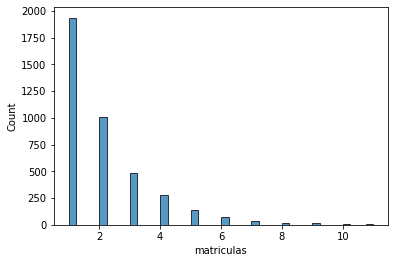

In [146]:
sns.histplot(nomes.matriculas)

In [147]:
## contar a insidencia de cursos por alunos

In [148]:
nomes.matriculas.value_counts()

1     1937
2     1010
3      486
4      278
5      141
6       72
7       38
8       17
9       13
11       4
10       4
Name: matriculas, dtype: int64

In [149]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
1050,RAILA,156,@servicodoemail.com,raila@servicodoemail.com,2
614,GREICE,3228,@servicodoemail.com,greice@servicodoemail.com,4
50,VINICIUS,122,@dominiodoemail.com.br,vinicius@dominiodoemail.com.br,2
1133,EDI,3882,@servicodoemail.com,edi@servicodoemail.com,1
880,DARLEI,1250,@servicodoemail.com,darlei@servicodoemail.com,1


## Selecionando os cursos

In [150]:
todas_matriculas = []
#calcular entre os 20 cursos
x = np.random.rand(20)
prob = x / sum(x)

In [151]:
x

array([0.69327453, 0.82744901, 0.21293851, 0.68379691, 0.86644596,
       0.25577511, 0.71129361, 0.81774292, 0.50495692, 0.35653405,
       0.9889421 , 0.29213892, 0.28339497, 0.43451336, 0.11985957,
       0.36074353, 0.33827097, 0.16175677, 0.39048043, 0.73815601])

In [152]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])         

In [153]:
matriculas.head()

,id_aluno,id_curso
0,760,6
1,2490,16
2,2490,2
3,2351,2
4,3432,2


In [156]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_alunos'})

,quantidade_alunos,nome_do_curso
id_curso,,
1,562,Lógica de programação
2,665,Java para Web
3,171,C# para Web
4,552,Ruby on Rails
5,752,Cursos de Python
6,224,PHP com MySql
7,595,.NET para web
8,650,Novas integrações com Java
9,412,TDD com Java


In [158]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [159]:
matriculas.head()

,id_aluno,id_curso
0,760,6
1,2490,16
2,2490,2
3,2351,2
4,3432,2


In [164]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

## Exportando a base de dados

In [165]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [166]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,562,Lógica de programação
1,665,Java para Web
2,171,C# para Web
3,552,Ruby on Rails
4,752,Cursos de Python
5,224,PHP com MySql
6,595,.NET para web
7,650,Novas integrações com Java
8,412,TDD com Java
9,285,Código limpo com C#


In [167]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"1":562,"2":665,"3":171,"4":552,"5":752,"6":224,"7":595,"8":650,"9":412,"10":285,"11":841,"12":222,"13":208,"14":345,"15":91,"16":297,"17":304,"18":143,"19":343,"20":605},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [168]:
matriculas_html = matriculas_por_curso.to_html()
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>562</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>665</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>171</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>552</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>752</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>224</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>595</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>650</td>\n      <td>Novas integrações com Jav

In [169]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>562</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>665</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>171</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>552</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>752</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>224</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>595</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>650</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>

## Criando banco sql

In [170]:
!pip install sqlalchemy


In [173]:
from sqlalchemy import create_engine, MetaData, Table

In [175]:
engine = create_engine('sqlite:///:memory:')

In [176]:
matriculas_por_curso.to_sql('matriculas', engine)

In [177]:
print(engine.table_names())

['matriculas']


## Buscando no banco sql

In [185]:
query = 'select * from matriculas where quantidade_de_alunos < 200'

In [186]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,3,171,C# para Web
1,15,91,Análise de dados
2,18,143,Programação funcional


In [187]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,3,171,C# para Web
1,15,91,Análise de dados
2,18,143,Programação funcional


In [188]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,562
1,Java para Web,665
2,C# para Web,171
3,Ruby on Rails,552
4,Cursos de Python,752
5,PHP com MySql,224
6,.NET para web,595
7,Novas integrações com Java,650
8,TDD com Java,412
9,Código limpo com C#,285


In [189]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [190]:
muitas_matriculas.query('quantidade_de_alunos > 60')

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,562
1,Java para Web,665
2,C# para Web,171
3,Ruby on Rails,552
4,Cursos de Python,752
5,PHP com MySql,224
6,.NET para web,595
7,Novas integrações com Java,650
8,TDD com Java,412
9,Código limpo com C#,285


In [191]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,562
1,Java para Web,665
2,C# para Web,171
3,Ruby on Rails,552
4,Cursos de Python,752
5,PHP com MySql,224
6,.NET para web,595
7,Novas integrações com Java,650
8,TDD com Java,412
9,Código limpo com C#,285


In [192]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [193]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']
